In [2]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load Data set
Crop_production_df=pa.read_excel("F:/DS/crop production analysis''/FAOSTAT_data.xlsx")

In [2]:
Crop_production_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.3,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.0,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.9,A,Official figure,NaN


In [3]:
Crop_production_df.drop('Year Code',axis=1,inplace=True)

In [4]:
Crop_production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       224647 non-null  object 
 1   Domain            224647 non-null  object 
 2   Area Code (M49)   224647 non-null  int64  
 3   Area              224647 non-null  object 
 4   Element Code      224647 non-null  int64  
 5   Element           224647 non-null  object 
 6   Item Code (CPC)   224642 non-null  object 
 7   Item              224647 non-null  object 
 8   Year              224647 non-null  int64  
 9   Unit              224645 non-null  object 
 10  Value             218130 non-null  float64
 11  Flag              224643 non-null  object 
 12  Flag Description  224634 non-null  object 
 13  Note              5098 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 24.0+ MB


In [5]:
Crop_production_df.isnull().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          5
Item                     0
Year                     0
Unit                     2
Value                 6517
Flag                     4
Flag Description        13
Note                219549
dtype: int64

In [6]:
Crop_production_df.shape

(224647, 14)

In [7]:
Crop_production_df.describe()

,Area Code (M49),Element Code,Year,Value
count,224647.000000,224647.000000,224647.000000,2.181300e+05
mean,426.797932,5407.125285,2020.971658,8.984848e+05
std,254.501789,101.321826,1.403592,1.201902e+07
min,4.000000,5111.000000,2019.000000,0.000000e+00
25%,203.000000,5312.000000,2020.000000,9.370000e+02
50%,414.000000,5412.000000,2021.000000,7.228200e+03
75%,643.000000,5510.000000,2022.000000,5.135000e+04
max,894.000000,5513.000000,2023.000000,7.825858e+08


In [8]:
for col in Crop_production_df.columns:
    if Crop_production_df[col].dtype in ['int64','float64']:
        Crop_production_df[col].fillna(Crop_production_df[col].mean(),inplace=True)
    else:
        Crop_production_df[col].fillna(Crop_production_df[col].mode()[0],inplace=True)

Missing_value=Crop_production_df.isnull().sum()
print(Missing_value)

C:\Users\nsiva\AppData\Local\Temp\ipykernel_2452\4112176342.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Crop_production_df[col].fillna(Crop_production_df[col].mode()[0],inplace=True)
C:\Users\nsiva\AppData\Local\Temp\ipykernel_2452\4112176342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64


In [9]:
Change_Column=['Area Code (M49)','Area','Element','Item Code (CPC)','Item', 'Year','Value']
Filtered_Data=Crop_production_df[Change_Column]
print(Filtered_Data)

        Area Code (M49)         Area         Element Item Code (CPC)  \
0                     4  Afghanistan  Area harvested            1371   
1                     4  Afghanistan           Yield            1371   
2                     4  Afghanistan      Production            1371   
3                     4  Afghanistan  Area harvested            1371   
4                     4  Afghanistan           Yield            1371   
...                 ...          ...             ...             ...   
224642              716     Zimbabwe      Production        22221.01   
224643              716     Zimbabwe      Production        22221.01   
224644              716     Zimbabwe      Production        22221.01   
224645              716     Zimbabwe      Production        22221.01   
224646              716     Zimbabwe      Production        24212.02   

                          Item  Year          Value  
0            Almonds, in shell  2019   29203.000000  
1            Almonds, in sh

In [10]:
Filtered_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code (M49)  224647 non-null  int64  
 1   Area             224647 non-null  object 
 2   Element          224647 non-null  object 
 3   Item Code (CPC)  224647 non-null  object 
 4   Item             224647 non-null  object 
 5   Year             224647 non-null  int64  
 6   Value            224647 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 12.0+ MB


In [11]:
# Data Preparation: Cleaning & Transformation
# Pivot dataset to convert it into wide format
df_pivot = Filtered_Data.pivot_table(index=["Area Code (M49)","Area", "Year","Item Code (CPC)", "Item"], 
                          columns="Element", 
                          values="Value").reset_index()

# Rename columns for clarity
df_pivot.columns.name = None  # Remove multi-index name
df_pivot.rename(columns={
    "Area harvested": "Area_Harvested",
    "Yield": "Yield_kg_per_ha",
    "Production": "Production_tons"
}, inplace=True)



In [12]:
df_pivot.head()

,Area Code (M49),Area,Year,Item Code (CPC),Item,Area_Harvested,Laying,Milk Animals,Producing Animals/Slaughtered,Production_tons,Stocks,Yield_kg_per_ha,Yield/Carcass Weight
0,4,Afghanistan,2019,0,Grapes,NaN,NaN,NaN,NaN,1112927.0,NaN,NaN,NaN
1,4,Afghanistan,2019,111,Wheat,2334000.0,NaN,NaN,NaN,4890000.0,NaN,2095.1,NaN
2,4,Afghanistan,2019,112,Maize (corn),94910.0,NaN,NaN,NaN,184671.0,NaN,1945.7,NaN
3,4,Afghanistan,2019,113,Rice,127530.0,NaN,NaN,NaN,570900.0,NaN,4476.6,NaN
4,4,Afghanistan,2019,115,Barley,84070.0,NaN,NaN,NaN,123576.0,NaN,1469.9,NaN


In [13]:
df_pivot.isnull().sum()
missing_presentage=(df_pivot.isnull().sum()/len(df_pivot))* 100
print(missing_presentage)

Area Code (M49)                   0.000000
Area                              0.000000
Year                              0.000000
Item Code (CPC)                   0.000000
Item                              0.000000
Area_Harvested                   47.557098
Laying                           98.885657
Milk Animals                     97.762975
Producing Animals/Slaughtered    81.175011
Production_tons                  11.078796
Stocks                           90.817358
Yield_kg_per_ha                  47.281901
Yield/Carcass Weight             93.425483
dtype: float64


In [14]:
df_pivot.drop(["Laying","Milk Animals","Producing Animals/Slaughtered","Stocks","Yield/Carcass Weight"],axis=1,inplace=True)

In [15]:
df_pivot.head()

,Area Code (M49),Area,Year,Item Code (CPC),Item,Area_Harvested,Production_tons,Yield_kg_per_ha
0,4,Afghanistan,2019,0,Grapes,NaN,1112927.0,NaN
1,4,Afghanistan,2019,111,Wheat,2334000.0,4890000.0,2095.1
2,4,Afghanistan,2019,112,Maize (corn),94910.0,184671.0,1945.7
3,4,Afghanistan,2019,113,Rice,127530.0,570900.0,4476.6
4,4,Afghanistan,2019,115,Barley,84070.0,123576.0,1469.9


In [16]:
df_pivot.isnull().sum()

Area Code (M49)        0
Area                   0
Year                   0
Item Code (CPC)        0
Item                   0
Area_Harvested     45622
Production_tons    10628
Yield_kg_per_ha    45358
dtype: int64

In [17]:
# Drop rows where both Area_Harvested and Yield_kg_per_ha are missing
df_pivot.dropna( inplace=True)

In [18]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44975 entries, 1 to 95903
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code (M49)  44975 non-null  int64  
 1   Area             44975 non-null  object 
 2   Year             44975 non-null  int64  
 3   Item Code (CPC)  44975 non-null  object 
 4   Item             44975 non-null  object 
 5   Area_Harvested   44975 non-null  float64
 6   Production_tons  44975 non-null  float64
 7   Yield_kg_per_ha  44975 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.1+ MB


In [19]:
df_pivot.head()

,Area Code (M49),Area,Year,Item Code (CPC),Item,Area_Harvested,Production_tons,Yield_kg_per_ha
1,4,Afghanistan,2019,111,Wheat,2334000.0,4890000.0,2095.1
2,4,Afghanistan,2019,112,Maize (corn),94910.0,184671.0,1945.7
3,4,Afghanistan,2019,113,Rice,127530.0,570900.0,4476.6
4,4,Afghanistan,2019,115,Barley,84070.0,123576.0,1469.9
5,4,Afghanistan,2019,118,Millet,1401.0,2714.0,1937.2


In [20]:
# Save cleaned data to an Excel file
df_pivot_file_path = "Transformed_data.xlsx"
df_pivot.to_excel(df_pivot_file_path, index=False)
print(f"Transformed data saved to '{df_pivot_file_path}'")

Transformed data saved to 'Transformed_data.xlsx'


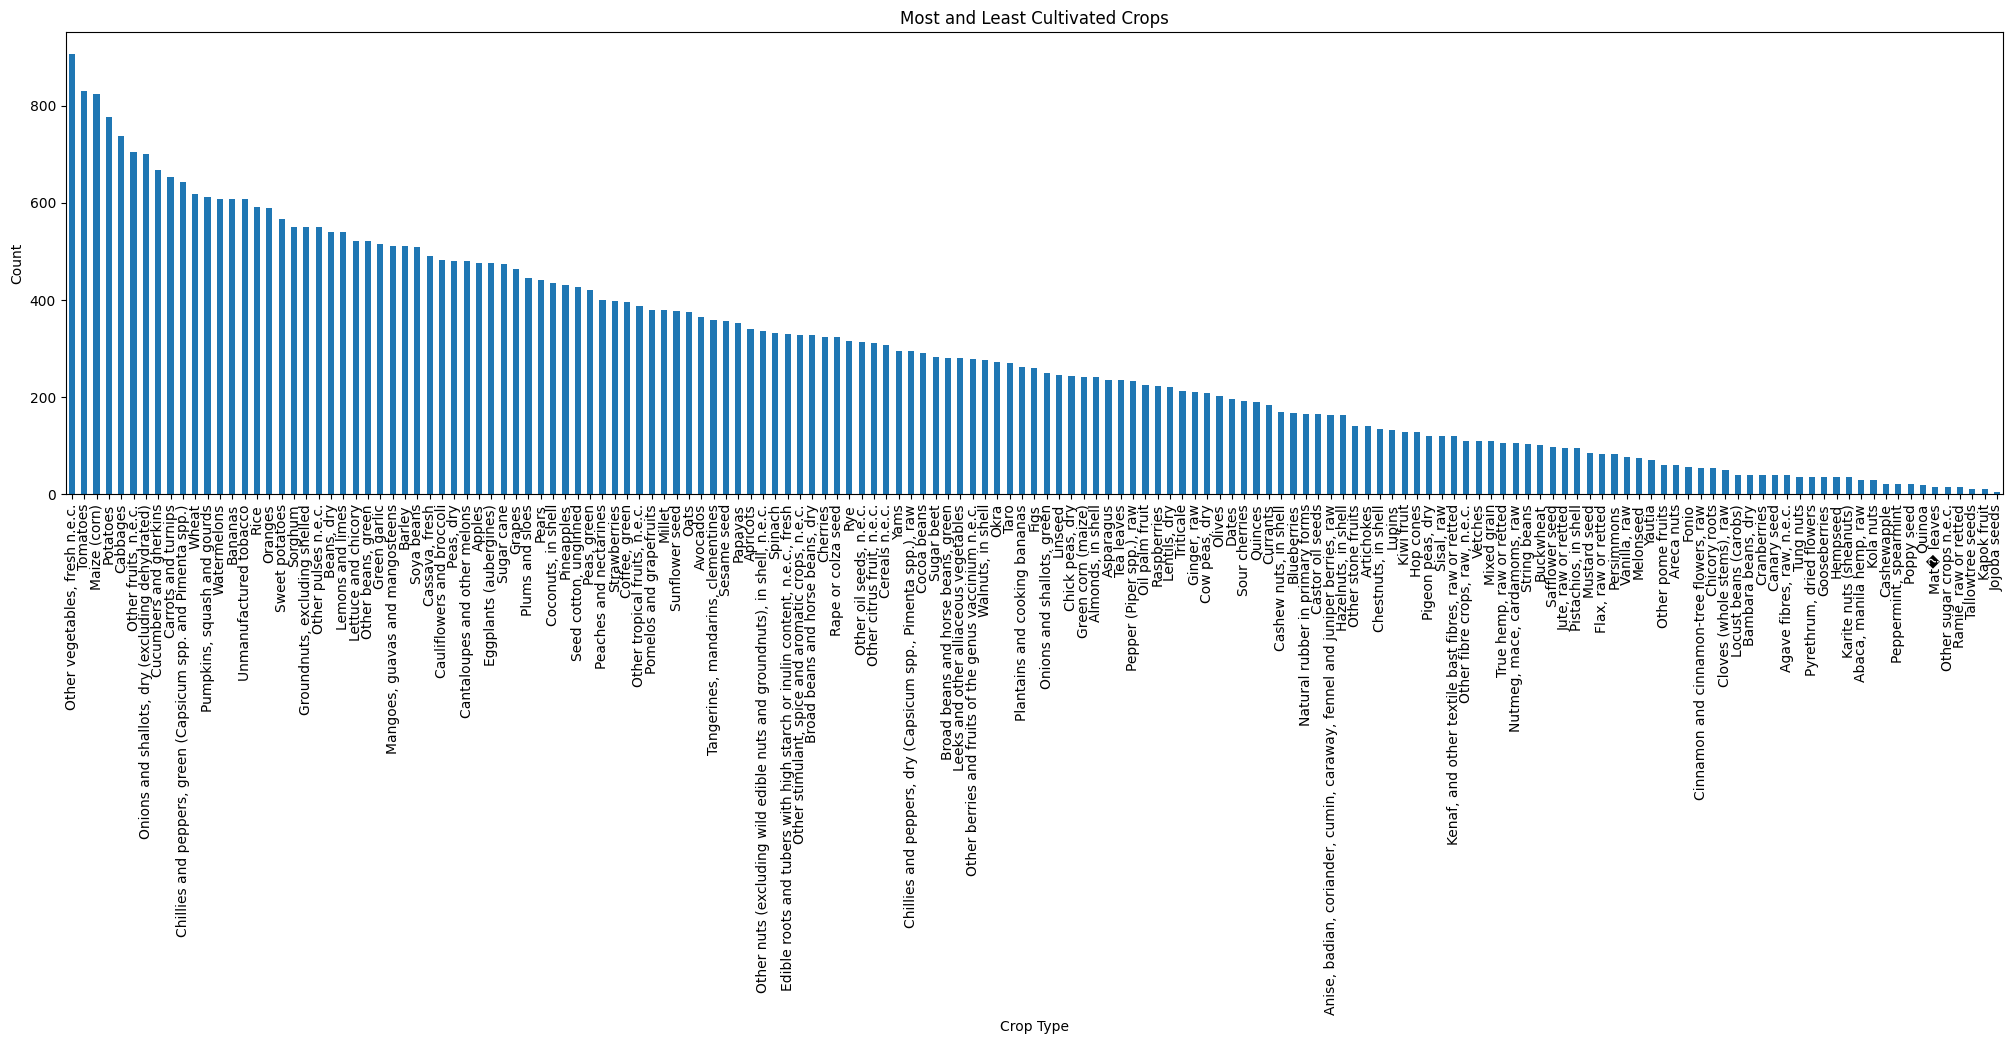

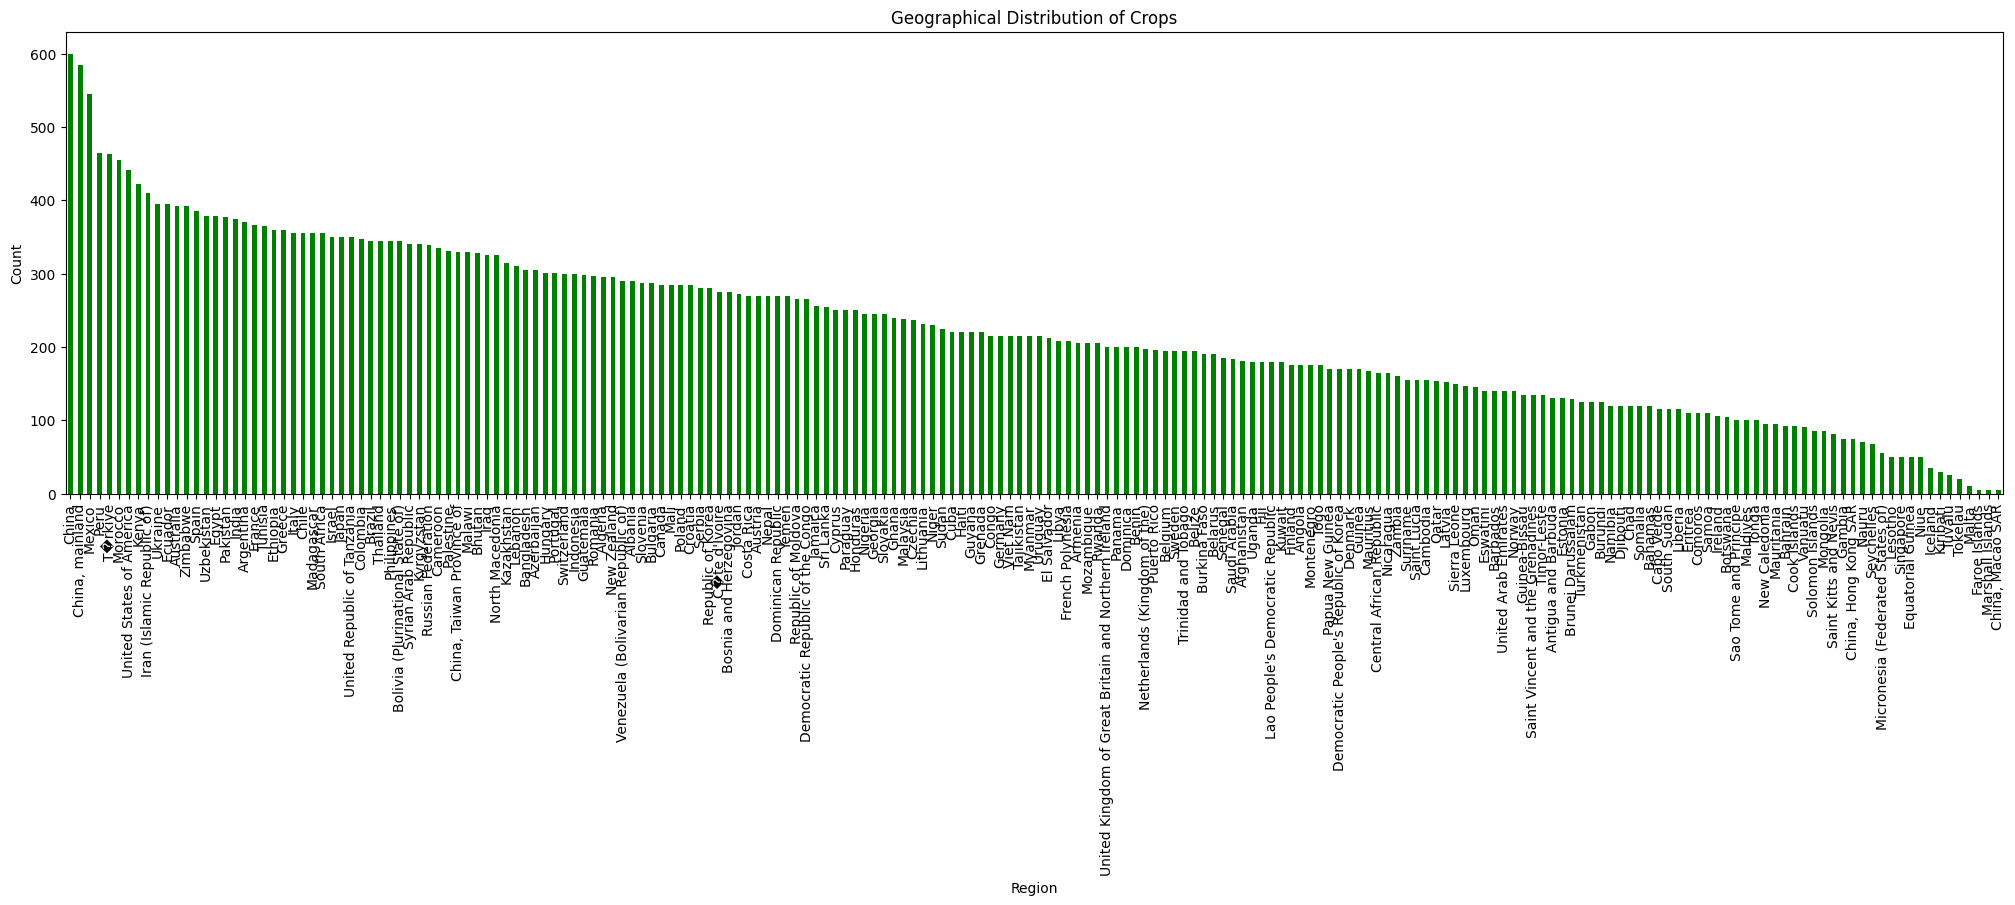

Most cultivated crop: Other vegetables, fresh n.e.c. (906 records)
Least cultivated crop: Jojoba seeds (5 records)
Region with highest agricultural activity: China (600 records)
Region with lowest agricultural activity: Faroe Islands (5 records)


In [20]:
# Exploratory Data Analysis (EDA)

# Analyze Crop Distribution
plt.figure(figsize=(25, 6))
df_pivot["Item"].value_counts().plot(kind='bar')
plt.title("Most and Least Cultivated Crops")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Geographical Distribution Analysis
plt.figure(figsize=(25, 6))
df_pivot["Area"].value_counts().plot(kind='bar', color='green')
plt.title("Geographical Distribution of Crops")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


# Most and Least Cultivated Crops
crop_counts = df_pivot["Item"].value_counts()
most_cultivated_crop = crop_counts.idxmax()  # Crop with highest count
least_cultivated_crop = crop_counts.idxmin()  # Crop with lowest count

print(f"Most cultivated crop: {most_cultivated_crop} ({crop_counts.max()} records)")
print(f"Least cultivated crop: {least_cultivated_crop} ({crop_counts.min()} records)")

# Most and Least Agricultural Regions
region_counts = df_pivot["Area"].value_counts()
most_agricultural_region = region_counts.idxmax()  # Region with highest count
least_agricultural_region = region_counts.idxmin()  # Region with lowest count

print(f"Region with highest agricultural activity: {most_agricultural_region} ({region_counts.max()} records)")
print(f"Region with lowest agricultural activity: {least_agricultural_region} ({region_counts.min()} records)")


<Figure size 1200x600 with 0 Axes>

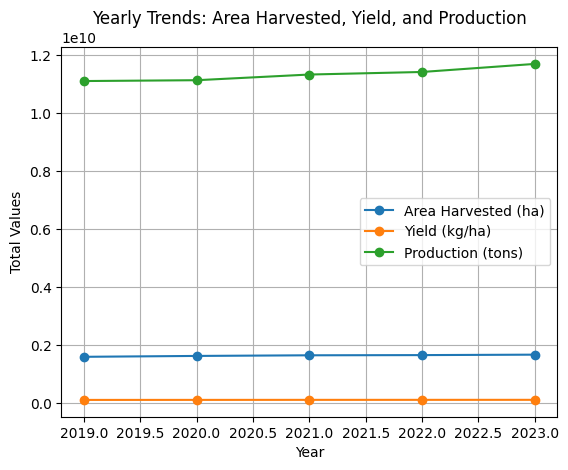

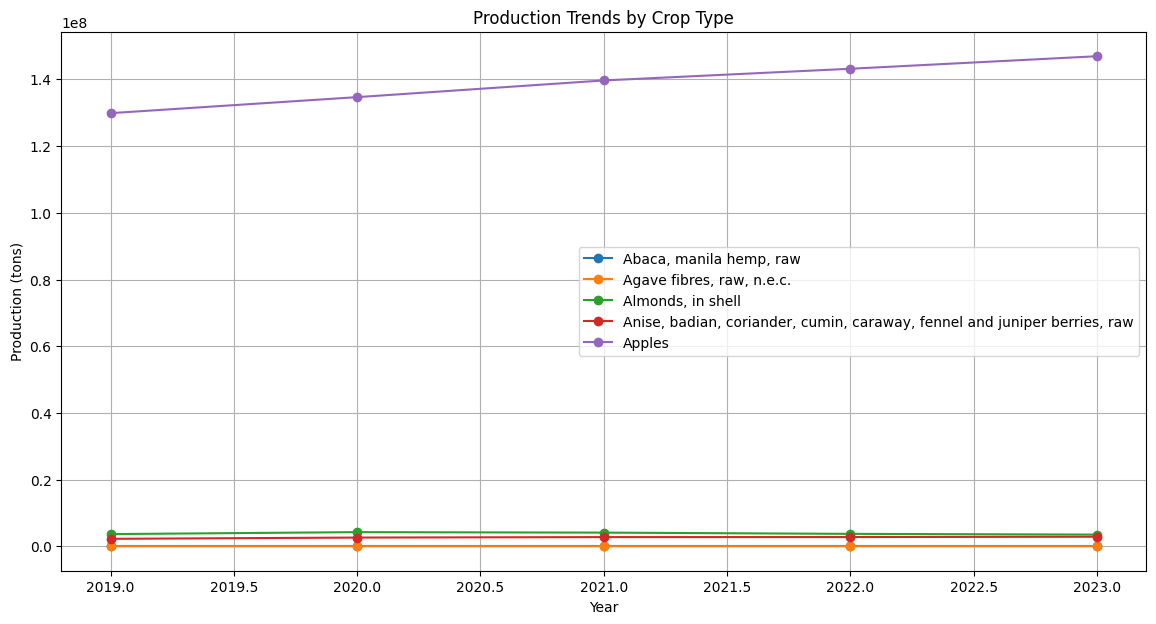

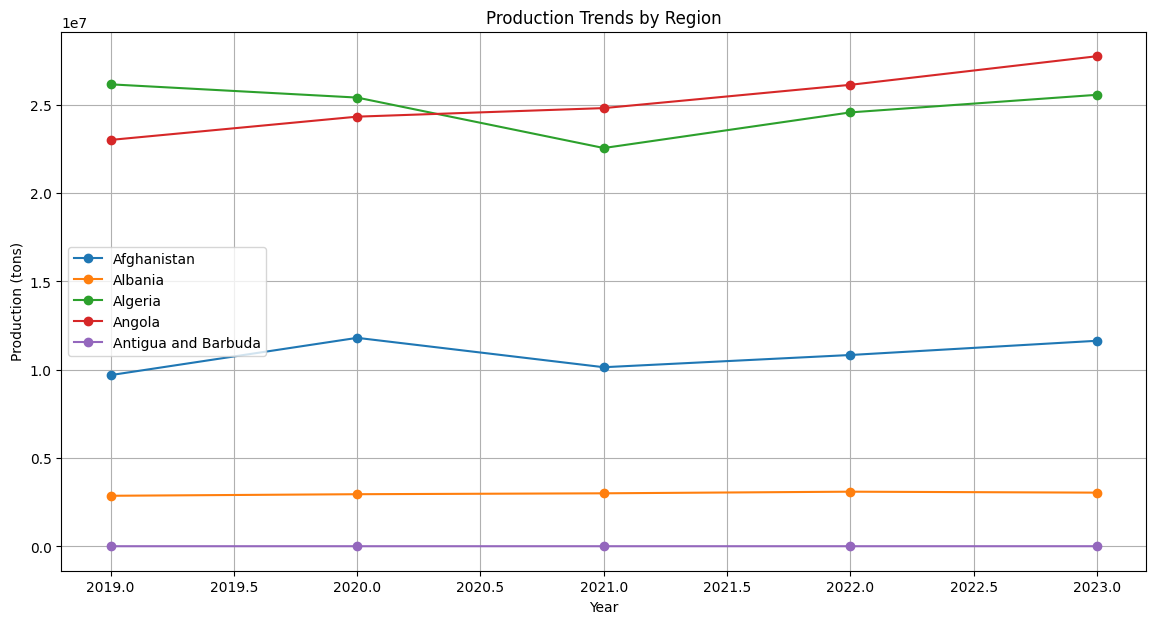

In [21]:
# Yearly Trends Analysis
plt.figure(figsize=(12, 6))
df_pivot.groupby("Year")[["Area_Harvested", "Yield_kg_per_ha", "Production_tons"]].sum().plot(marker='o')
plt.title("Yearly Trends: Area Harvested, Yield, and Production")
plt.xlabel("Year")
plt.ylabel("Total Values")
plt.legend(["Area Harvested (ha)", "Yield (kg/ha)", "Production (tons)"])
plt.grid(True)
plt.show()


# Growth Analysis: Crop-wise Production Trends
crop_growth = df_pivot.groupby(["Item", "Year"])[["Yield_kg_per_ha", "Production_tons"]].sum().reset_index()

plt.figure(figsize=(14, 7))
for crop in crop_growth["Item"].unique()[:5]:  # First 5 crops for clarity
    subset = crop_growth[crop_growth["Item"] == crop]
    plt.plot(subset["Year"], subset["Production_tons"], marker='o', label=crop)

plt.title("Production Trends by Crop Type")
plt.xlabel("Year")
plt.ylabel("Production (tons)")
plt.legend()
plt.grid(True)
plt.show()

# Growth Analysis: Region-wise Production Trends
region_growth = df_pivot.groupby(["Area", "Year"])[["Yield_kg_per_ha", "Production_tons"]].sum().reset_index()

plt.figure(figsize=(14, 7))
for region in region_growth["Area"].unique()[:5]:  # First 5 regions for clarity
    subset = region_growth[region_growth["Area"] == region]
    plt.plot(subset["Year"], subset["Production_tons"], marker='o', label=region)

plt.title("Production Trends by Region")
plt.xlabel("Year")
plt.ylabel("Production (tons)")
plt.legend()
plt.grid(True)
plt.show()

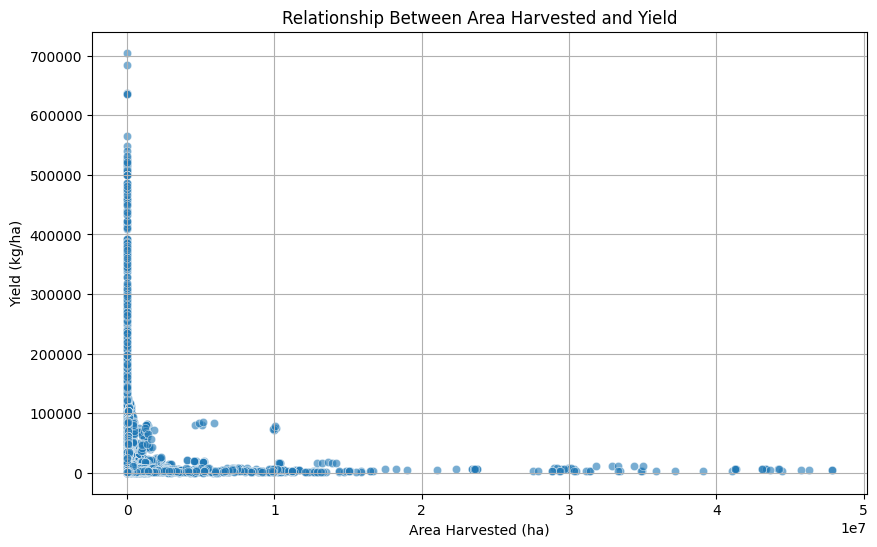

In [23]:
# Scatter Plot: Area Harvested vs. Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pivot, x="Area_Harvested", y="Yield_kg_per_ha", alpha=0.6)
plt.title("Relationship Between Area Harvested and Yield")
plt.xlabel("Area Harvested (ha)")
plt.ylabel("Yield (kg/ha)")
plt.grid(True)
plt.show()



Correlation Matrix:
                  Area_Harvested  Yield_kg_per_ha  Production_tons
Area_Harvested         1.000000        -0.026555         0.640861
Yield_kg_per_ha       -0.026555         1.000000         0.052952
Production_tons        0.640861         0.052952         1.000000


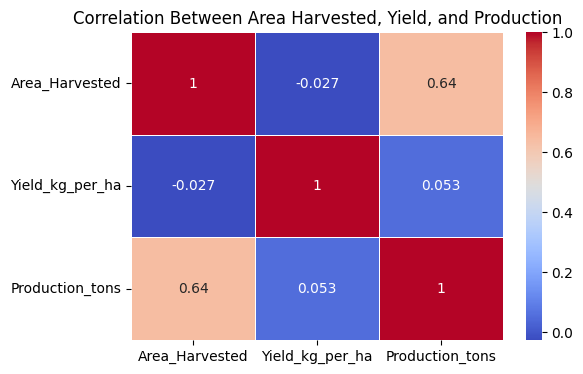

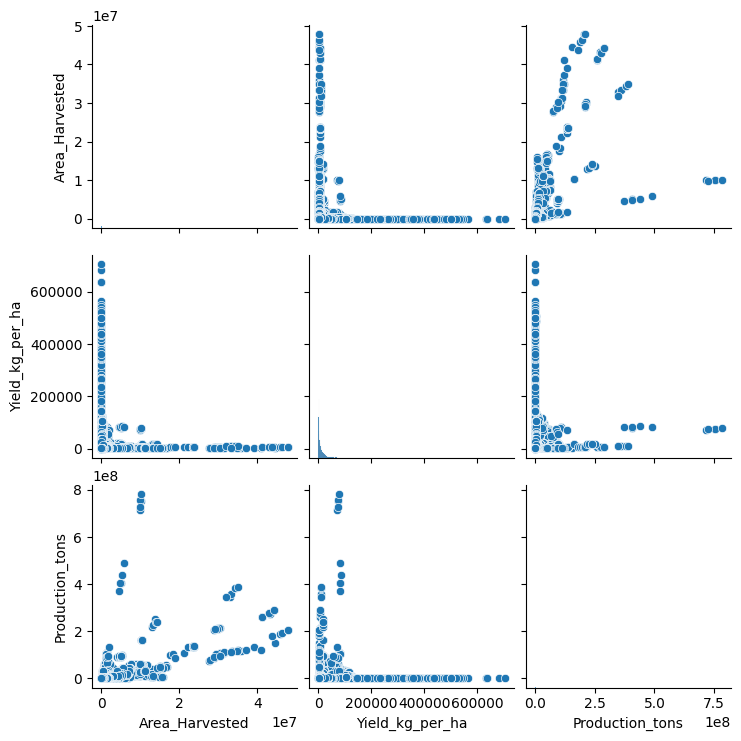

In [24]:
# Correlation Matrix
correlation_matrix = df_pivot[["Area_Harvested", "Yield_kg_per_ha", "Production_tons"]].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Area Harvested, Yield, and Production")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df_pivot[["Area_Harvested", "Yield_kg_per_ha", "Production_tons"]])
plt.show()

In [22]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify anomalies in Yield and Production
yield_anomalies = detect_outliers_iqr(df_pivot, "Yield_kg_per_ha")
production_anomalies = detect_outliers_iqr(df_pivot, "Production_tons")

# Display results
print("Yield Anomalies Detected:", len(yield_anomalies))
print("Production Anomalies Detected:", len(production_anomalies))


Yield Anomalies Detected: 3305
Production Anomalies Detected: 7229


In [23]:
df_pivot.shape

(44975, 8)

In [24]:
df_pivot.head()

,Area Code (M49),Area,Year,Item Code (CPC),Item,Area_Harvested,Production_tons,Yield_kg_per_ha
1,4,Afghanistan,2019,111,Wheat,2334000.0,4890000.0,2095.1
2,4,Afghanistan,2019,112,Maize (corn),94910.0,184671.0,1945.7
3,4,Afghanistan,2019,113,Rice,127530.0,570900.0,4476.6
4,4,Afghanistan,2019,115,Barley,84070.0,123576.0,1469.9
5,4,Afghanistan,2019,118,Millet,1401.0,2714.0,1937.2


In [25]:
df_pivot.describe()

,Area Code (M49),Year,Area_Harvested,Production_tons,Yield_kg_per_ha
count,44975.000000,44975.000000,4.497500e+04,4.497500e+04,44975.000000
mean,425.685425,2021.005270,1.823613e+05,1.259881e+06,12584.404400
std,256.194264,1.413834,1.475049e+06,1.307915e+07,26424.976455
min,4.000000,2019.000000,0.000000e+00,0.000000e+00,0.000000
25%,196.000000,2020.000000,4.730000e+02,2.177130e+03,1873.000000
50%,408.000000,2021.000000,3.780000e+03,2.238800e+04,5892.100000
75%,643.000000,2022.000000,2.679000e+04,1.645763e+05,14783.450000
max,894.000000,2023.000000,4.783200e+07,7.825858e+08,705196.700000


In [26]:
df_pivot.head()

,Area Code (M49),Area,Year,Item Code (CPC),Item,Area_Harvested,Production_tons,Yield_kg_per_ha
1,4,Afghanistan,2019,111,Wheat,2334000.0,4890000.0,2095.1
2,4,Afghanistan,2019,112,Maize (corn),94910.0,184671.0,1945.7
3,4,Afghanistan,2019,113,Rice,127530.0,570900.0,4476.6
4,4,Afghanistan,2019,115,Barley,84070.0,123576.0,1469.9
5,4,Afghanistan,2019,118,Millet,1401.0,2714.0,1937.2


# Train linear Regression Model

In [27]:
# Split dataset
X = df_pivot[["Year", "Area Code (M49)", "Item Code (CPC)", "Area_Harvested", "Yield_kg_per_ha"]]
y = df_pivot["Production_tons"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Linear Regression Performance:
MAE: 1552435.97
MSE: 212063871570511.22
R² Score: 0.30


In [31]:
print(df_pivot.columns)

Index(['Area Code (M49)', 'Area', 'Year', 'Item Code (CPC)', 'Item',
       'Area_Harvested', 'Production_tons', 'Yield_kg_per_ha'],
      dtype='object')


In [28]:
# Create mapping dictionaries (Area & Item)
area_mapping = dict(zip(df_pivot["Area"], df_pivot["Area Code (M49)"]))
item_mapping = dict(zip(df_pivot["Item"], df_pivot["Item Code (CPC)"]))

# Define target and features
target = "Production_tons"
features = ["Year", "Area Code (M49)", "Item Code (CPC)", "Area_Harvested", "Yield_kg_per_ha"]

X = df_pivot[features]
y = df_pivot[target]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=250, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Random Forest Regression Performance:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.2f}")

#  Function to Predict Crop Production (using names)
def predict_production(year, area_name, crop_name, area_harvested, yield_kg_per_ha):
    # Convert area & crop names to corresponding codes
    area_code = area_mapping.get(area_name, None)
    item_code = item_mapping.get(crop_name, None)

    if area_code is None:
        print(f" Error: Area '{area_name}' not found in dataset.")
        return None
    if item_code is None:
        print(f" Error: Crop '{crop_name}' not found in dataset.")
        return None

    # Create DataFrame with numerical values
    input_data = pa.DataFrame([[year, area_code, item_code, area_harvested, yield_kg_per_ha]],
                              columns=features)

    # Scale input data
    input_data_scaled = scaler.transform(input_data)

    # Predict production
    predicted_production = rf_model.predict(input_data_scaled)

    return predicted_production[0]

#  Example Prediction using Area & Crop Name
predicted_value = predict_production(2025, "India", "Wheat", 10000, 3000)

if predicted_value is not None:
    print(f"\n Predicted Crop Production for 2025 in India (Wheat): {predicted_value:.2f} tons")

 Random Forest Regression Performance:
 Mean Absolute Error (MAE): 227968.87
 Mean Squared Error (MSE): 55552574372464.47
 R² Score: 0.82

 Predicted Crop Production for 2025 in India (Wheat): 28305.00 tons


# Gradient Boosting Regressor

In [22]:
# Create mapping dictionaries (Area & Item)
area_mapping = dict(zip(df_pivot["Area"], df_pivot["Area Code (M49)"]))
item_mapping = dict(zip(df_pivot["Item"], df_pivot["Item Code (CPC)"]))

# Define target and features
target = "Production_tons"
features = ["Year", "Area Code (M49)", "Item Code (CPC)", "Area_Harvested", "Yield_kg_per_ha"]

X = df_pivot[features]
y = df_pivot[target]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=250, learning_rate=0.01, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = gb_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Gradient Boosting Regression Performance:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

#  Function to Predict Crop Production (using names)
def predict_production(year, area_name, crop_name, area_harvested, yield_kg_per_ha):
    # Convert area & crop names to corresponding codes
    area_code = area_mapping.get(area_name, None)
    item_code = item_mapping.get(crop_name, None)

    if area_code is None:
        print(f"Error: Area '{area_name}' not found in dataset.")
        return None
    if item_code is None:
        print(f"Error: Crop '{crop_name}' not found in dataset.")
        return None

    # Create DataFrame with numerical values
    input_data = pa.DataFrame([[year, area_code, item_code, area_harvested, yield_kg_per_ha]],
                              columns=features)

    # Scale input data
    input_data_scaled = scaler.transform(input_data)

    # Predict production
    predicted_production = gb_model.predict(input_data_scaled)

    return predicted_production[0]

#  Example Prediction using Area & Crop Name
predicted_value = predict_production(2025, "India", "Wheat", 10000, 3000)

if predicted_value is not None:
    print(f"\n Predicted Crop Production for 2025 in India (Wheat): {predicted_value:.2f} tons")

 Gradient Boosting Regression Performance:
 Mean Absolute Error (MAE): 420749.25
 Mean Squared Error (MSE): 36989020967045.13
R² Score: 0.88

 Predicted Crop Production for 2025 in India (Wheat): 155442.97 tons


# XGBoost Regression

In [21]:

import numpy as np
import xgboost as xgb



# Create mapping dictionaries (Area & Item)
area_mapping = dict(zip(df_pivot["Area"], df_pivot["Area Code (M49)"]))
item_mapping = dict(zip(df_pivot["Item"], df_pivot["Item Code (CPC)"]))

# Define target and features
target = "Production_tons"
features = ["Year", "Area Code (M49)", "Item Code (CPC)", "Area_Harvested", "Yield_kg_per_ha"]

X = df_pivot[features]
y = df_pivot[target]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=250, learning_rate=0.01, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" XGBoost Regression Performance:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.2f}")

#  Function to Predict Crop Production (using names)
def predict_production(year, area_name, crop_name, area_harvested, yield_kg_per_ha):
    # Convert area & crop names to corresponding codes
    area_code = area_mapping.get(area_name, None)
    item_code = item_mapping.get(crop_name, None)

    if area_code is None:
        print(f" Error: Area '{area_name}' not found in dataset.")
        return None
    if item_code is None:
        print(f" Error: Crop '{crop_name}' not found in dataset.")
        return None

    # Create DataFrame with numerical values
    input_data = pa.DataFrame([[year, area_code, item_code, area_harvested, yield_kg_per_ha]],
                              columns=features)

    # Scale input data
    input_data_scaled = scaler.transform(input_data)

    # Predict production
    predicted_production = xgb_model.predict(input_data_scaled)

    return predicted_production[0]

#  Example Prediction using Area & Crop Name
predicted_value = predict_production(2025, "India", "Wheat", 10000, 3000)

if predicted_value is not None:
    print(f"\n Predicted Crop Production for 2025 in India (Wheat): {predicted_value:.2f} tons")

 XGBoost Regression Performance:
 Mean Absolute Error (MAE): 472937.94
 Mean Squared Error (MSE): 39341880355455.90
 R² Score: 0.87

 Predicted Crop Production for 2025 in India (Wheat): 150426.39 tons
